In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [3]:

# Function to import the dataset
def importdata():
    balance_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data')

    # Displaying dataset information
    print("Dataset Length: ", len(balance_data))
    print("Dataset Shape: ", balance_data.shape)
    print("Dataset: ", balance_data.head())
    
    return balance_data

In [4]:
# Function to split the dataset into features and target variables
def splitdataset(balance_data):

    # Separating the target variable
    X = balance_data.values[:, 1:5]
    Y = balance_data.values[:, 0]

    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=100)

    return X, Y, X_train, X_test, y_train, y_test

In [5]:
def train_using_Gini(X_train,Y_train):
    DecTree = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=5,random_state=22,max_depth=3)
    trained_model = DecTree.fit(X_train,Y_train)
    return trained_model

In [6]:
def train_using_entropy(X_train,Y_train):
    Dec_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_leaf_nodes=5,random_state=3)
    trained_model = Dec_tree.fit(X_train,Y_train)
    return trained_model

In [7]:
def prediction(X_test,trained_model ):
    Y_hat = trained_model.predict(X_test)
    return Y_hat

In [8]:
def Accuracy(Y_test,Y_hat ):
    accuracy = accuracy_score(Y_test,Y_hat)*100
    print(f'Accuracy : {accuracy}')
    confusion = confusion_matrix(Y_test,Y_hat)
    print(f'confusion_matrix:{confusion}')
    class_report =classification_report(Y_test,Y_hat)
    print(f"Classification : {class_report}")

In [9]:
def plot_descision_tree(classified_objects,feature_names,class_names):
    plt.Figure(figsize=(15,15))
    plot_tree(classified_objects,class_names=class_names,feature_names=feature_names,filled=True,rounded=True)
    plt.show()
    return plot_tree

Dataset Length:  624
Dataset Shape:  (624, 5)
Dataset:     B  1  1.1  1.2  1.3
0  R  1    1    1    2
1  R  1    1    1    3
2  R  1    1    1    4
3  R  1    1    1    5
4  R  1    1    2    1


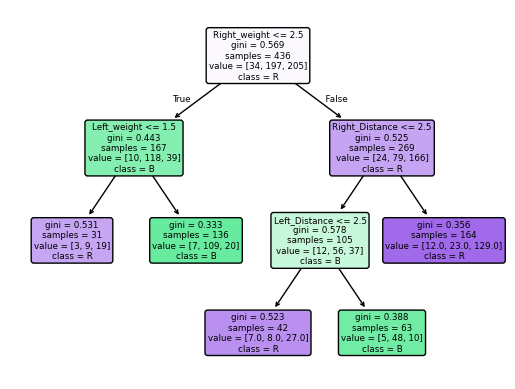

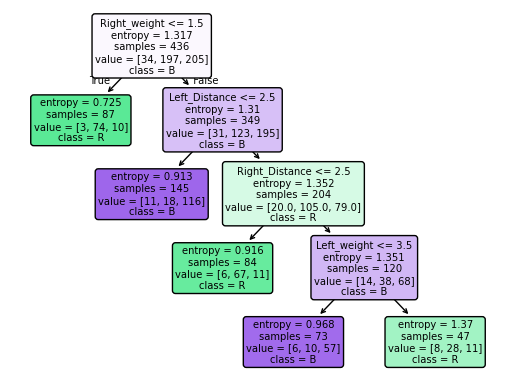

In [12]:
if __name__ == '__main__':
    data = importdata()
    X,Y,X_train,X_test,y_train,y_test = splitdataset(data)

    #trin using GIni
    Gini = train_using_Gini(X_train,y_train)
 
    #train using entropt
    Entropy = train_using_entropy(X_train,y_train)

    #plot something
    plot_descision_tree(Gini,['Left_Distance', 'Left_weight' ,'Right_weight' , 'Right_Distance'],
                        ['L','B','R'])
    plot_descision_tree(Entropy,['Left_Distance', 'Left_weight' ,'Right_weight' , 'Right_Distance'],['L','R','B'])

In [11]:
Gini_result = prediction(X_test,Gini)
Entropy_result = prediction(X_test,Entropy)

Accuracy(y_test,Gini_result)
Accuracy(y_test,Entropy_result)



Accuracy : 70.2127659574468
confusion_matrix:[[ 0  8  6]
 [ 0 66 25]
 [ 0 17 66]]
Classification :               precision    recall  f1-score   support

           B       0.00      0.00      0.00        14
           L       0.73      0.73      0.73        91
           R       0.68      0.80      0.73        83

    accuracy                           0.70       188
   macro avg       0.47      0.51      0.49       188
weighted avg       0.65      0.70      0.67       188

Accuracy : 73.40425531914893
confusion_matrix:[[ 0  9  5]
 [ 0 72 19]
 [ 0 17 66]]
Classification :               precision    recall  f1-score   support

           B       0.00      0.00      0.00        14
           L       0.73      0.79      0.76        91
           R       0.73      0.80      0.76        83

    accuracy                           0.73       188
   macro avg       0.49      0.53      0.51       188
weighted avg       0.68      0.73      0.71       188



c:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\m